In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["BloodPressure"].value_counts().sort_values()

122     1
40      1
38      1
24      1
114     1
61      1
102     1
95      1
104     2
108     2
55      2
46      2
30      2
106     3
100     3
110     3
98      3
96      4
44      4
48      5
85      6
94      6
65      7
75      8
92      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
0      35
60     37
76     39
80     40
64     43
72     44
78     45
68     45
74     52
70     57
Name: BloodPressure, dtype: int64

In [8]:
df["SkinThickness"].value_counts().sort_values()

99      1
60      1
51      1
63      1
56      1
8       2
7       2
52      2
54      2
49      3
50      3
47      4
48      4
10      5
44      5
45      6
43      6
11      6
16      6
14      6
12      7
38      7
46      8
34      8
21     10
13     11
42     11
24     12
20     13
17     14
15     14
36     14
41     15
35     15
25     16
40     16
22     16
26     16
37     16
29     17
39     18
19     18
31     19
28     20
18     20
33     20
23     22
27     23
30     27
32     31
0     227
Name: SkinThickness, dtype: int64

In [9]:
df["BMI"].value_counts().sort_values()

42.8     1
20.1     1
30.3     1
30.7     1
43.2     1
        ..
33.3    10
0.0     11
31.2    12
31.6    12
32.0    13
Name: BMI, Length: 248, dtype: int64

<p><b><li>Here we can observe that the null values is replaced by 0, 
    because how a person can have BMI, skinthickness, BloodPressure, etc 
    as 0 it is not possible so we will replace it with some central tendency.</b></li></p>   

In [10]:
# Replacing 0 by NaN

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
# Again, getting no. of missing values in each column 

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Filling NaN values 

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [13]:
# Checking missing values correctly replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

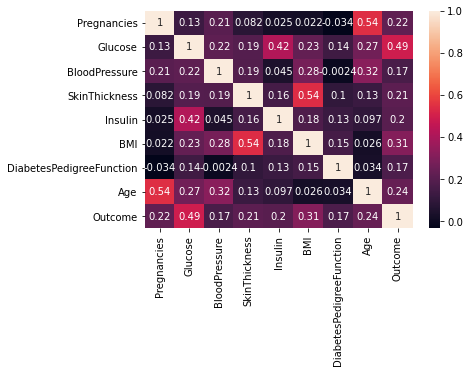

In [14]:
sns.heatmap(df.corr(),annot = True)

In [15]:
# Finding pairwise correlation of all columns

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281319,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [16]:
# Getting unique values 

df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [17]:
# Finding counts of unique values and sorting it in ascending order

df['Pregnancies'].value_counts().sort_values()

17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
Name: Pregnancies, dtype: int64

In [18]:
# Grouping predictor variables by target variable

df.groupby("Outcome")[["Pregnancies","Glucose","BloodPressure"]].agg(['max','min','mean'])

Pregnancies               Glucose                   BloodPressure  \
                max min      mean     max   min        mean           max   
Outcome                                                                     
0                13   0  3.298000   197.0  44.0  110.682000         122.0   
1                17   0  4.865672   199.0  78.0  142.130597         114.0   

                          
          min       mean  
Outcome                   
0        24.0  70.920000  
1        30.0  75.123134

In [19]:
df.groupby("Outcome")[["SkinThickness","Insulin","BMI","Age"]].agg(['max','min','mean'])

SkinThickness                 Insulin                     BMI        \
                  max  min       mean     max   min        mean   max   min   
Outcome                                                                       
0                60.0  7.0  27.726000   744.0  15.0  127.792000  57.3  18.2   
1                99.0  7.0  31.686567   846.0  14.0  164.701493  67.1  22.9   

                   Age                 
              mean max min       mean  
Outcome                                
0        30.888434  81  21  31.190000  
1        35.384757  70  21  37.067164

In [20]:
# Model
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
# Naive aggregation

lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [23]:
model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
# hard voting
vc1 =  VotingClassifier(estimators=model_list)

In [26]:
vc1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt1', DecisionTreeClassifier()),
                             ('dt2',
                              DecisionTreeClassifier(criterion='entropy'))])

In [27]:
y_pred = vc1.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [29]:
# soft voting
vc2 =  VotingClassifier(estimators=model_list,voting="soft")

In [30]:
vc2.fit(X_train,y_train)
y_pred = vc2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       146
           1       0.67      0.61      0.64        85

    accuracy                           0.74       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [31]:
# Bootstrap Aggregation

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bg = BaggingClassifier(LogisticRegression(), n_estimators=10, max_samples=100,random_state=1)

In [34]:
bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [35]:
# Pasting
bg2 = BaggingClassifier(LogisticRegression(), max_samples=100,random_state=1,bootstrap=False)

In [36]:
bg2.fit(X_train,y_train)
y_pred = bg2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [37]:
# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)

In [40]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.81      0.59      0.68        85

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.77       231
weighted avg       0.80      0.80      0.79       231



In [41]:
# stacking
from mlxtend.classifier import StackingClassifier

In [42]:
# !conda install mlxtend --channel conda-forge

In [43]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [44]:
model_list = [lr, dt1, dt2]

In [45]:
meta_lr = LogisticRegression()

In [46]:
sc = StackingClassifier(classifiers=model_list, meta_classifier=meta_lr)

In [47]:
sc.fit(X_train,y_train)

StackingClassifier(classifiers=[LogisticRegression(), DecisionTreeClassifier(),
                                DecisionTreeClassifier(criterion='entropy')],
                   meta_classifier=LogisticRegression())

In [48]:
y_pred = sc.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       146
           1       0.69      0.60      0.64        85

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [50]:
sc.meta_clf_.coef_

array([[0.71229784, 4.01885897, 4.01885897]])